# Denoising using CuDnn
It is just to test that our neural network learn something relevant

In [1]:
import numpy as np
import tensorflow as tf
from model import denoiser
from utils_train import *
import scipy
import scipy.misc
import matplotlib.pyplot as plt
import imz2mat
import utils
%matplotlib inline

/cluster/storage/shorache/.conda/envs/bestenv/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


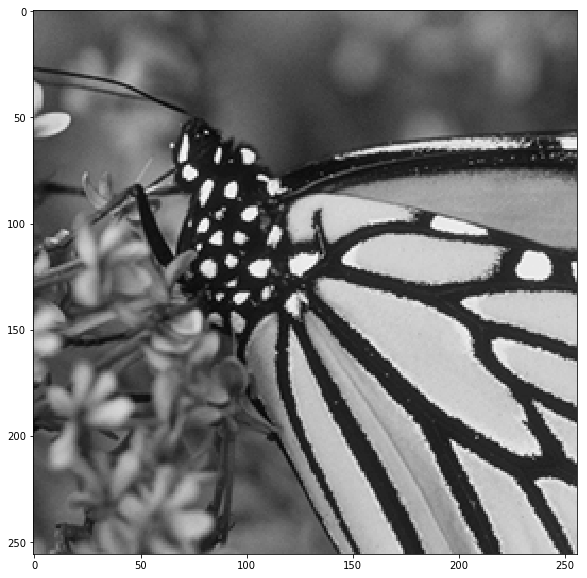

In [2]:
#img_gt = utils.robust_scale(imz2mat.imz2mat('data/PileSaintGervais_moyennearithmetique.imf')[0], normal=False)
img_gt = scipy.misc.imread('data/test/Set12/05.png').astype(np.float32)/255
#img_gt = img_gt + 25 * np.random.randn(img_gt.shape[0], img_gt.shape[1])
#img_gt = img_gt/255
plt.figure(figsize=(10,10))
plt.imshow(img_gt, cmap='gray')



In [ ]:
ckpt_dir = "./checkpoint_sar"
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    model = denoiser(sess, sigma=25)
    model.load(ckpt_dir)
    denoised, noisy_img, psnr = model.denoise(img_gt.reshape(img_gt.shape[0], img_gt.shape[1], 1, 1))
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.imshow(denoised.reshape(img_gt.shape), cmap='gray')
    plt.subplot(122)
    plt.imshow(noisy_img.reshape(img_gt.shape), cmap='gray')

In [ ]:
print(psnr)